## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('/Users/manuelramirez/Documents/1600185186_GridSearchKNN_Case_Study/data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:

diabetes_data['Glucose']=diabetes_data['Glucose'].replace(0, np.nan)
diabetes_data['BloodPressure']=diabetes_data['BloodPressure'].replace(0, np.nan)
diabetes_data['SkinThickness']=diabetes_data['SkinThickness'].replace(0, np.nan)
diabetes_data['Insulin']=diabetes_data['Insulin'].replace(0, np.nan)
diabetes_data['BMI']=diabetes_data['BMI'].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

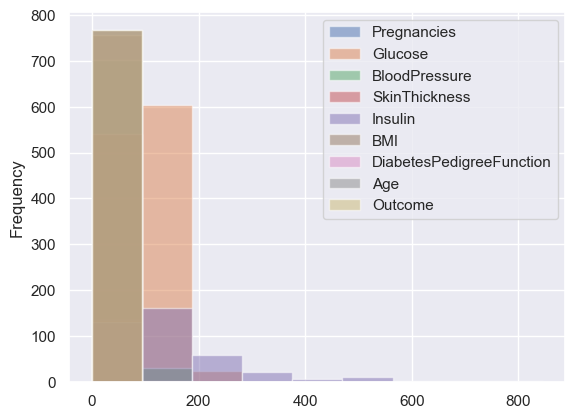

In [6]:

ax = diabetes_data.plot.hist(bins=9, alpha=0.5)

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

/var/folders/r5/3dggsj8j2nb31d981xff89tc0000gn/T/ipykernel_46503/2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
/var/folders/r5/3dggsj8j2nb31d981xff89tc0000gn/T/ipykernel_46503/2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [8]:
diabetes_data['Glucose'] = diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean())
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean())
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median())
diabetes_data['Insulin'] = diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median())
diabetes_data['BMI'] = diabetes_data['BMI'].fillna(diabetes_data['BMI'].median())


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

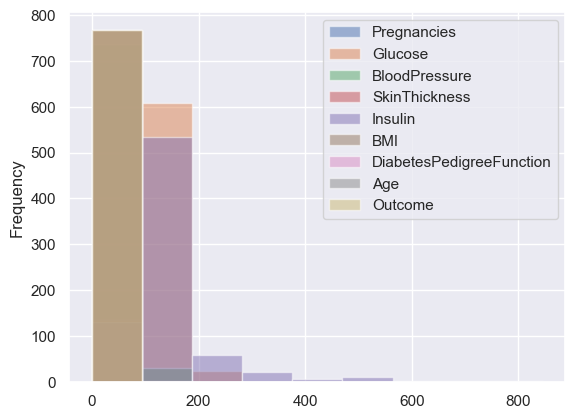

In [9]:

ax = diabetes_data.plot.hist(bins=9, alpha=0.5)

#### Plot the correlation matrix heatmap

Correlation between various features


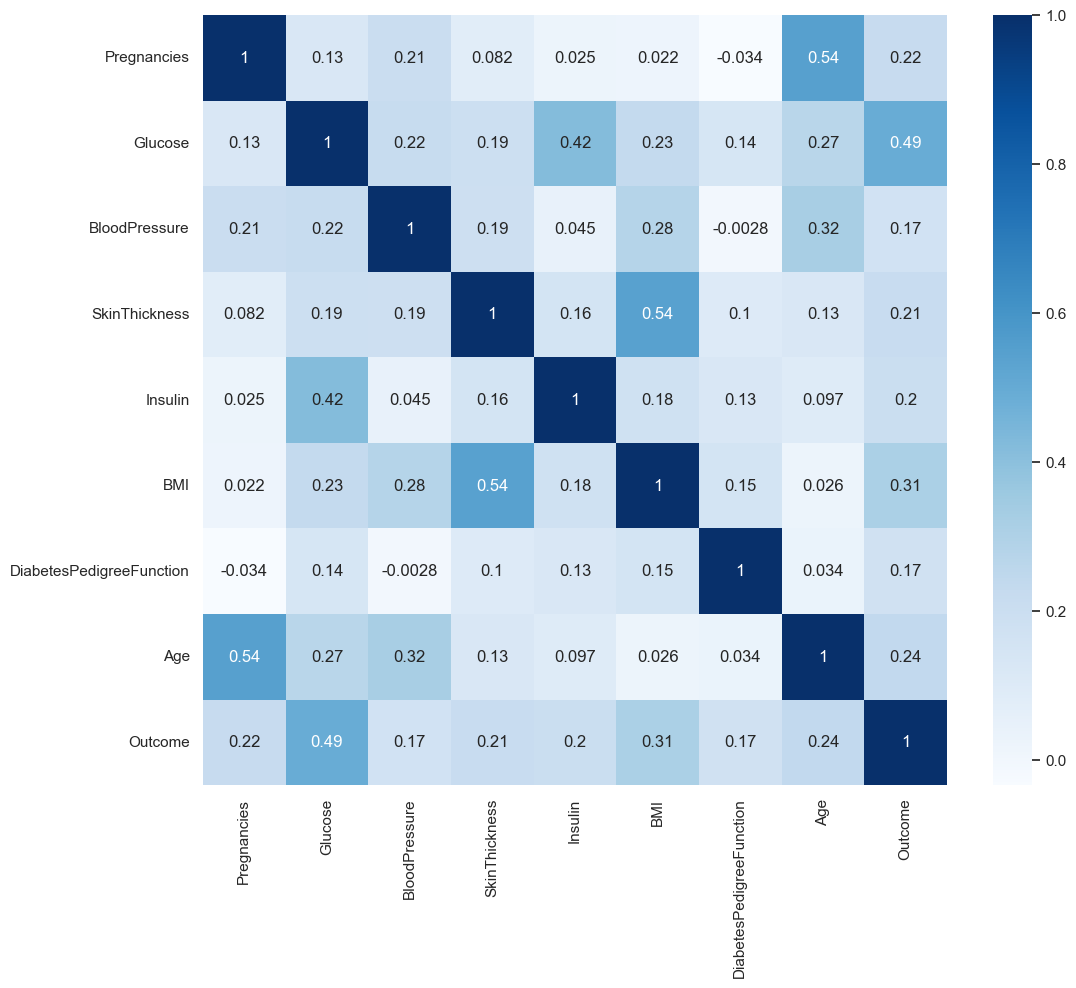

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:

from sklearn.model_selection import train_test_split
y=diabetes_data[['Outcome']]
# dont forget to define your X and y
#df=df.drop(columns='global_num')
#X=df
X=diabetes_data.drop(columns='Outcome')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
619,1
198,1
538,0
329,0


**<font color='teal'> Create a 70/30 train and test split. </font>**

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [12]:
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train.values.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    print(train_scores)
    print(test_scores)

[1.0]
[0.683982683982684]
[1.0, 0.845437616387337]
[0.683982683982684, 0.7056277056277056]
[1.0, 0.845437616387337, 0.839851024208566]
[0.683982683982684, 0.7056277056277056, 0.6926406926406926]
[1.0, 0.845437616387337, 0.839851024208566, 0.8212290502793296]
[0.683982683982684, 0.7056277056277056, 0.6926406926406926, 0.70995670995671]
[1.0, 0.845437616387337, 0.839851024208566, 0.8212290502793296, 0.8212290502793296]
[0.683982683982684, 0.7056277056277056, 0.6926406926406926, 0.70995670995671, 0.670995670995671]
[1.0, 0.845437616387337, 0.839851024208566, 0.8212290502793296, 0.8212290502793296, 0.8212290502793296]
[0.683982683982684, 0.7056277056277056, 0.6926406926406926, 0.70995670995671, 0.670995670995671, 0.7012987012987013]
[1.0, 0.845437616387337, 0.839851024208566, 0.8212290502793296, 0.8212290502793296, 0.8212290502793296, 0.8119180633147114]
[0.683982683982684, 0.7056277056277056, 0.6926406926406926, 0.70995670995671, 0.670995670995671, 0.7012987012987013, 0.696969696969697]
[

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [21]:
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
    
train_scores.append(train_score)
test_scores.append(test_score)
    
    # Print scores for each iteration
print(f"Neighbors: {i} -> Train Score: {train_score:.4f}, Test Score: {test_score:.4f}")


Neighbors: 9 -> Train Score: 0.7952, Test Score: 0.7100


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [24]:
best_train_k = np.argmax(train_scores) + 1  # Add 1 because Python index starts at 0

print(f"\nBest number of neighbors for training data: {best_train_k} with score {max(train_scores):.4f}")



Best number of neighbors for training data: 1 with score 1.0000


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [23]:
best_test_k = np.argmax(test_scores) + 1
print(f"Best number of neighbors for testing data: {best_test_k} with score {max(test_scores):.4f}")

Best number of neighbors for testing data: 4 with score 0.7100


Plot the train and test model performance by number of neighbors.

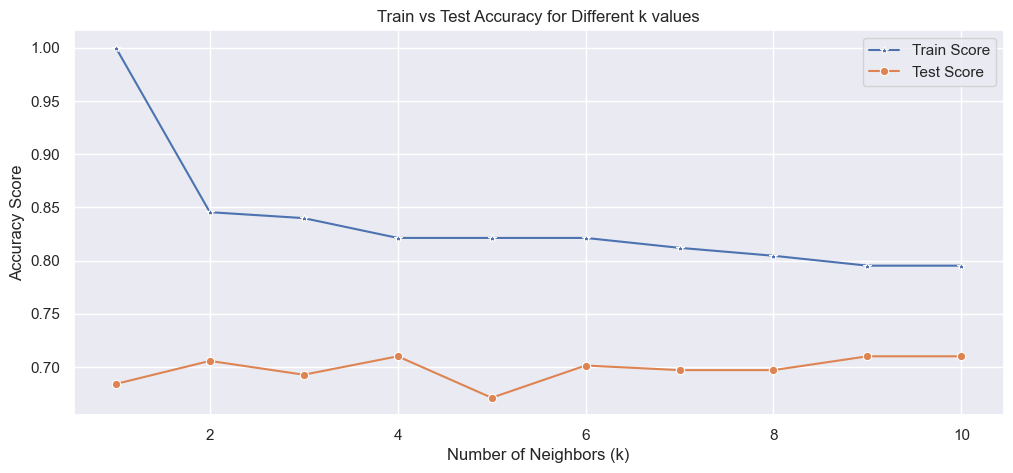

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Correct the lineplot function calls
sns.lineplot(x=range(1, 11), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 11), y=test_scores, marker='o', label='Test Score')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Train vs Test Accuracy for Different k values")
plt.legend()
plt.show()


**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [27]:

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
from sklearn.ensemble import RandomForestRegressor 


In [31]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

In [32]:
 # create regressor object 
#clf= RandomForestRegressor(n_estimators = 100, random_state = 0) 
#model_res = clf.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
pl = confusion_matrix(y_test,y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

NameError: name 'X_test_scaled' is not defined

In [33]:
class_names=['Outcome']

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

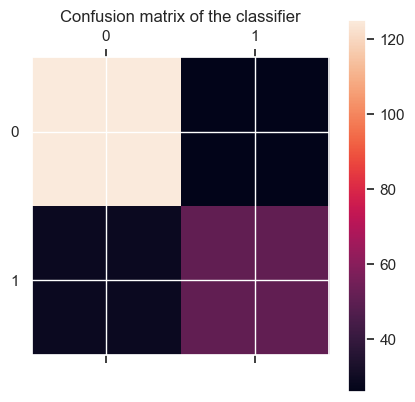

In [34]:
import pylab as pl
cm = confusion_matrix(y_test, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

**<font color='teal'> Print the classification report </font>**

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [37]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Ensure X and y are correctly formatted
X = X.values  # If X is a Pandas DataFrame
y = y.values.ravel()  # Ensure y is a 1D array

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Apply GridSearchCV with 5-fold cross-validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model
knn_cv.fit(X, y)

# Print the best parameter
print(f"Best n_neighbors: {knn_cv.best_params_}")


Best n_neighbors: {'n_neighbors': np.int64(31)}


#### Print the best score and best parameter for n_neighbors.

In [38]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': np.int64(31)}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Ensure y is a 1D array
y = y.ravel()  # Only needed if y is a column vector

# Define the parameter grid for n_estimators
param_grid = {'n_estimators': np.arange(10, 200, 10)}  # Testing from 10 to 200 estimators

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Apply GridSearchCV with 5-fold cross-validation
rf_cv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)  # n_jobs=-1 uses all CPU cores

# Fit the model
rf_cv.fit(X, y)

# Print the best number of estimators
print(f"Best number of estimators: {rf_cv.best_params_['n_estimators']}")


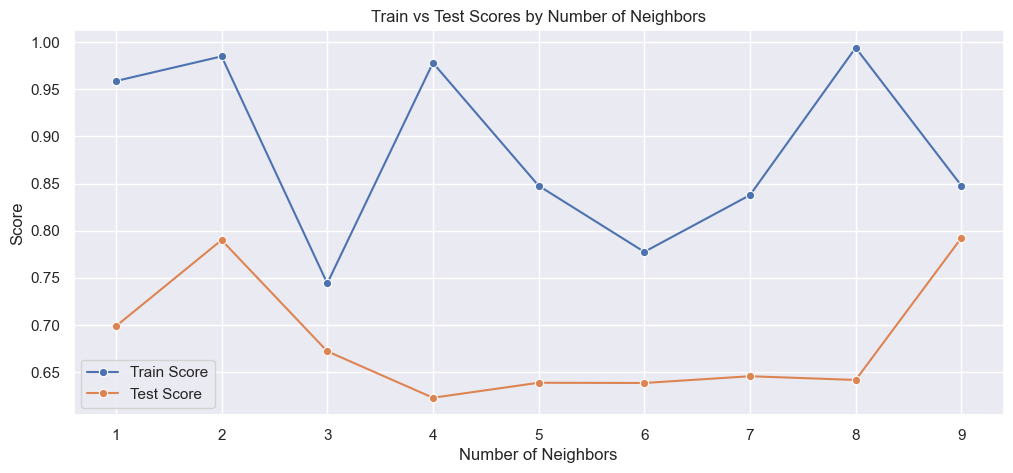

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data (Replace these with your actual train/test scores)
k_values = np.arange(1, 10)  # Neighbor values from 1 to 9
train_scores = np.random.rand(9) * 0.3 + 0.7  # Simulated train scores
test_scores = np.random.rand(9) * 0.3 + 0.6  # Simulated test scores

plt.figure(figsize=(12,5))

sns.lineplot(x=k_values, y=train_scores, marker='o', label='Train Score')
sns.lineplot(x=k_values, y=test_scores, marker='o', label='Test Score')

plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Train vs Test Scores by Number of Neighbors")
plt.legend()
plt.grid(True)

# Ensure the graph is displayed
plt.show()
